<a href="https://colab.research.google.com/github/Harman2607/ML_Scratch/blob/master/MNIST/MNIST_SCRATCH_2_betterlossgraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt

In [0]:
# MNIST DATASET CLASSIFICATION
import numpy as np
import sys
from sklearn.datasets import fetch_openml
X, y= fetch_openml('mnist_784', version=1, return_X_y=True)
assert(X.shape==(70000,784))
# we have the rolled out dataset now. 

5


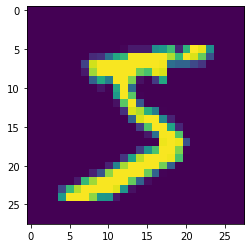

In [3]:
# total 70000 pics 
np.set_printoptions(threshold=sys.maxsize)

X=X/255
X_train, X_test = np.transpose(X[:60000]), np.transpose(X[60000:])
y_train, y_test = y[:60000], y[60000:]

tuples_train = [(np.int(y_train[i]),i) for i in range(60000)] 
rows_train, cols_train = zip(*tuples_train)
tuples_test = [(np.int(y_test[i]),i) for i in range(10000)] 
rows_test, cols_test = zip(*tuples_test)

Y_train,Y_test = np.zeros((10,60000)), np.zeros((10,10000))
# The outputs are -
Y_train[rows_train, cols_train], Y_test[rows_test, cols_test] = [1 for j in range(60000)], [1 for j in range(10000)]

assert(Y_train.shape == (10,60000))
assert(Y_test.shape == (10,10000))
assert(X_train.shape==(784,60000))
assert(X_test.shape==(784,10000))
# just for visualization
plt.imshow(X[0].reshape(28,28))
print(y[0])

In [0]:
def initialize_parameters(nx,nh1,nh2,ny):
  # weight matrices initialization
  # W = np.empty(3)
  W1 = np.random.randn(nh1,784) * 0.01
  W2 = np.random.randn(nh2,nh1) * 0.01
  W3 = np.random.randn(10,nh2) * 0.01

  # b=np.empty(3)

  b1 = np.zeros((nh1,1))
  b2 = np.zeros((nh2,1))
  b3 = np.zeros((10,1))

  parameters = {'b1' : b1, 'b2' : b2, 'b3' : b3, 'W1' : W1, 'W2' : W2, 'W3' : W3} 

  return parameters



In [0]:
def compute_loss(y_obtained,y_train,m):

  # print('obtained output is %s and correct output is %s' %(y_obtained,y_train))
  cost = np.sum(np.square(y_obtained-y_train))/(2 * m)
  return cost


In [0]:
def act_func(Z):

  return np.tanh(Z)

def derivative_actfunc(Z):

  return 1-np.square(np.tanh(Z))

In [0]:
def gradients(Wthis,Zprev,dZthis,Athis,Aprev,m,actfunc):
# note the notation convention is dc = dloss/dc

  dZprev =  np.dot(np.transpose(Wthis),dZthis) * (derivative_actfunc(Zprev))
  dbthis = (np.sum(dZthis, axis = 1, keepdims=True))/m
  dWthis = (np.dot(dZthis,np.transpose(Aprev)))/m

  return (dZprev, dWthis, dbthis)

In [0]:
def trainmodel(X_train,Y_train,iterations,m,mtotal,learning_rate):
  parameters = initialize_parameters(nx,nh1,nh2,ny)

  batch_counter = 0
  lossDict = {}
  full_lossdict = {}
  for count in range (0,iterations):

    x_train = X_train[:,batch_counter : batch_counter + m]
    y_train = Y_train[:,batch_counter : batch_counter + m]

    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    b1 = parameters['b1']
    b2 = parameters['b2']
    b3 = parameters['b3']

    # forward prop
    Z1 = np.dot(W1,x_train) + b1
    A1 = act_func(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = act_func(Z2)
    Z3 = np.dot(W3,A2) + b3
    A3 = act_func(Z3)
    assert(A3.shape == (10,m))

    # caculate cost and update to dict

    if(count%100 == 0):
      Z1_ = np.dot(W1,X_train) + b1
      A1_ = act_func(Z1_)
      Z2_ = np.dot(W2,A1_) + b2
      A2_ = act_func(Z2_)
      Z3_ = np.dot(W3,A2_) + b3
      A3_ = act_func(Z3_)
      fullloss = compute_loss(A3_,Y_train,mtotal)
      full_lossdict[str(count)] = fullloss
      loss = compute_loss(A3,y_train,m) 
      lossDict[str(count)] = loss
      if(count%100 == 0):
        print('loss is %f after %d iterations' %(loss,count))

    # back prop
    dZ3 = (A3 - y_train) * (derivative_actfunc(Z3))
    dZ2, dW3, db3 = gradients(parameters['W3'],Z2,dZ3,A3,A2,m,act_func) 
    dZ1, dW2, db2 = gradients(parameters['W2'],Z1,dZ2,A2,A1,m,act_func) 
    dW1 = (np.dot(dZ1, np.transpose(x_train)))/m
    db1 = (np.sum(dZ1, axis = 1, keepdims=True))/m
    grads = {'dW1' : dW1, 'dW2' : dW2, 'dW3' : dW3, 'db1' : db1, 'db2' : db2, 'db3' : db3}

    # update parameters
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['W3'] -= learning_rate * grads['dW3']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['b2'] -= learning_rate * grads['db2']
    parameters['b3'] -= learning_rate * grads['db3']

    batch_counter = (batch_counter+m)%mtotal

  return lossDict, full_lossdict, parameters

    

In [39]:
# no. of training examples
mtotal=60000

# batch size for BGD
m = 10

# layer dimensions
nx = 784
nh1 = 500
nh2 = 500
ny = 10

# number of iterations
iterations  = 1000

# learning_rate
learning_rate = 0.1

# train the model
costs, alltraining_costs, modelparameters = trainmodel(X_train,Y_train,iterations,m,mtotal,learning_rate)


loss is 0.502823 after 0 iterations
loss is 0.329435 after 100 iterations
loss is 0.253824 after 200 iterations
loss is 0.230666 after 300 iterations
loss is 0.244131 after 400 iterations
loss is 0.179078 after 500 iterations
loss is 0.170883 after 600 iterations
loss is 0.262551 after 700 iterations
loss is 0.199751 after 800 iterations
loss is 0.274352 after 900 iterations


model test accuracy = 82.430000
model train accuracy = 81.773333


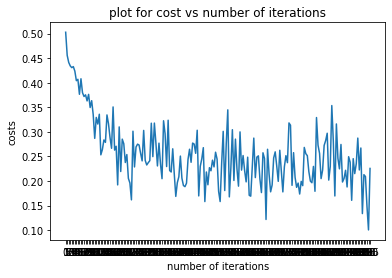

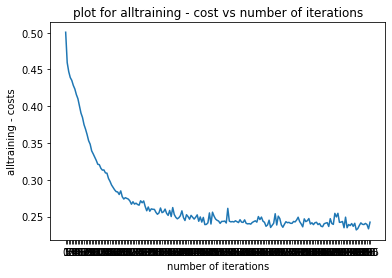

In [40]:
# testmodel
trainsize = X_train.shape[1]
testsize = X_test.shape[1]
W1 = modelparameters['W1']
W2 = modelparameters['W2']
W3 = modelparameters['W3']
b1 = modelparameters['b1']
b2 = modelparameters['b2']
b3 = modelparameters['b3']

Z1 = np.dot(W1,X_test) + b1
A1 = act_func(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = act_func(Z2)
Z3 = np.dot(W3,A2) + b3
A3 = act_func(Z3)

# test accuracy
prediction = np.argmax(A3,axis = 0)
required = np.argmax(Y_test,axis = 0)
correct  = np.sum(np.equal(prediction,required))
testaccuracy = 100 * (correct/testsize)  

print('model test accuracy = %f' %testaccuracy)

Z1 = np.dot(W1,X_train) + b1
A1 = act_func(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = act_func(Z2)
Z3 = np.dot(W3,A2) + b3
A3 = act_func(Z3)

# train accuracy
prediction_train = np.argmax(A3,axis = 0)
required_train = np.argmax(Y_train,axis = 0)
correct_train  = np.sum(np.equal(prediction_train,required_train))
trainaccuracy = 100 * (correct_train/trainsize)  

print('model train accuracy = %f' %trainaccuracy)
    
  

# plot costs
plt.plot(list(costs.keys()), list(costs.values()))
plt.ylabel('costs')
plt.xlabel('number of iterations')
# plt.xticks(rotation = 1)
plt.title('plot for cost vs number of iterations')
plt.show()


plt.plot(list(alltraining_costs.keys()), list(alltraining_costs.values()))
plt.ylabel('alltraining - costs')
plt.xlabel('number of iterations')
# plt.xticks(rotation = 1)
plt.title('plot for alltraining - cost vs number of iterations')
plt.show()
